# Application Definition

Fungsi application generation agar bisa digunakan pada YAFS

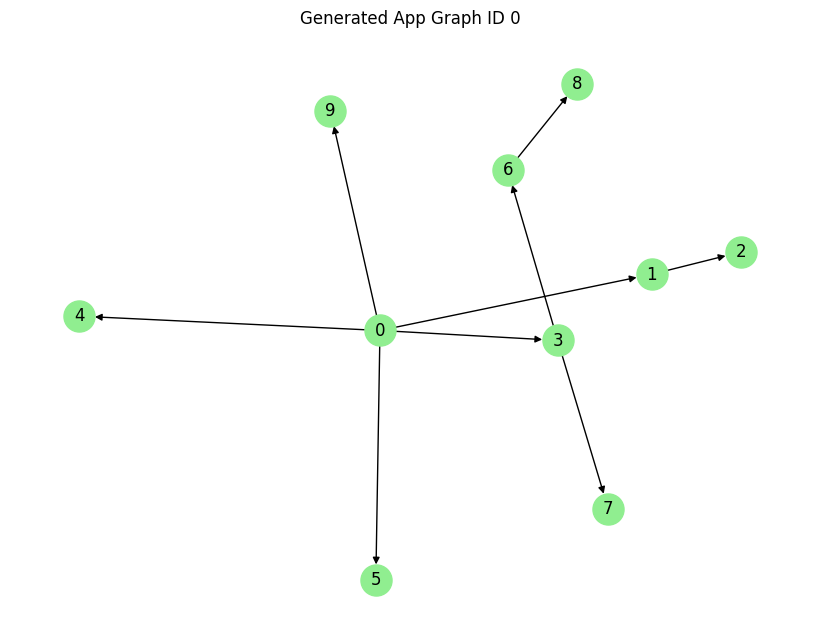

App JSON with correct transmission saved as generated/generated_app.json


In [1]:
import networkx as nx
import random
import json
import matplotlib.pyplot as plt

def generate_random_app(app_id: int, total_services: int, graphic_terminal: bool = False):
    num_nodes = 10
    # num_nodes = random.randint(2, 10)
    APP = nx.gn_graph(num_nodes).reverse()
    mapping = dict(zip(APP.nodes(), range(total_services, total_services + len(APP.nodes))))
    APP = nx.relabel_nodes(APP, mapping)

    service_resources = {node: random.randint(1, 6) for node in APP.nodes()}
    topologic_order = list(nx.topological_sort(APP))
    source = topologic_order[0]

    my_app = {
        "id": app_id,
        "name": str(app_id),
        "deadline": random.randint(2600, 6600),
        "module": [],
        "message": [],
        "transmission": []
    }

    edge_number = 0
    total_MIPS = 0

    # MODULE generation
    for n in APP.nodes:
        my_node = {
            "id": n,
            "name": f"{app_id}_{n}",
            "RAM": service_resources[n],
            "type": "MODULE"
        }
        my_app["module"].append(my_node)

    # SOURCE message generation and transmission
    my_edge = {
        "id": edge_number,
        "name": f"M.USER.APP.{app_id}",
        "s": "None",
        "d": f"{app_id}_{source}",
        "instructions": random.randint(20000, 60000),
        "bytes": random.randint(1500000, 4500000)
    }
    my_app["message"].append(my_edge)
    total_MIPS += my_edge["instructions"]
    edge_number += 1

    for o in APP.edges:
        if o[0] == source:
            my_transmission = {
                "module": f"{app_id}_{source}",
                "message_in": f"M.USER.APP.{app_id}",
                "message_out": f"{app_id}_({o[0]}-{o[1]})"
            }
            my_app["transmission"].append(my_transmission)

    # EDGE message generation with transmission
    for e in APP.edges:
        my_edge = {
            "id": edge_number,
            "name": f"{app_id}_({e[0]}-{e[1]})",
            "s": f"{app_id}_{e[0]}",
            "d": f"{app_id}_{e[1]}",
            "instructions": random.randint(20000, 60000),
            "bytes": random.randint(1500000, 4500000)
        }
        my_app["message"].append(my_edge)
        total_MIPS += my_edge["instructions"]
        edge_number += 1

        dest_node = e[1]
        for o in APP.edges:
            if o[0] == dest_node:
                my_transmission = {
                    "module": f"{app_id}_{dest_node}",
                    "message_in": f"{app_id}_({e[0]}-{e[1]})",
                    "message_out": f"{app_id}_({o[0]}-{o[1]})"
                }
                my_app["transmission"].append(my_transmission)

    # Handle leaf nodes without outgoing edges
    for n in APP.nodes:
        has_outgoing = any(m[0] == n for m in APP.edges)
        if not has_outgoing:
            for m in APP.edges:
                if m[1] == n:
                    my_transmission = {
                        "module": f"{app_id}_{n}",
                        "message_in": f"{app_id}_({m[0]}-{m[1]})",
                        "message_out": None
                    }
                    my_app["transmission"].append(my_transmission)

    if graphic_terminal:
        plt.figure(figsize=(8, 6))
        pos = nx.spring_layout(APP)
        nx.draw(APP, pos, with_labels=True, node_color='lightgreen', edge_color='black', node_size=500)
        plt.title(f"Generated App Graph ID {app_id}")
        plt.show()

    return my_app, APP

if __name__ == "__main__":
    random.seed(42)
    app, graph = generate_random_app(app_id=0, total_services=0, graphic_terminal=True)
    with open("generated/generated_app.json", "w") as f:
        json.dump(app, f, indent=4)
    print("App JSON with correct transmission saved as generated/generated_app.json")